In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_csv('waze_dataset.csv')
data.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [3]:
# Display basic information
print("Dataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB
None


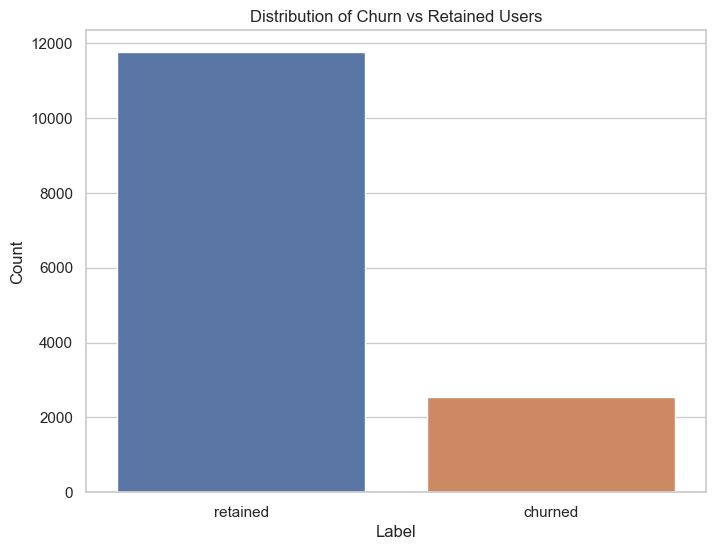

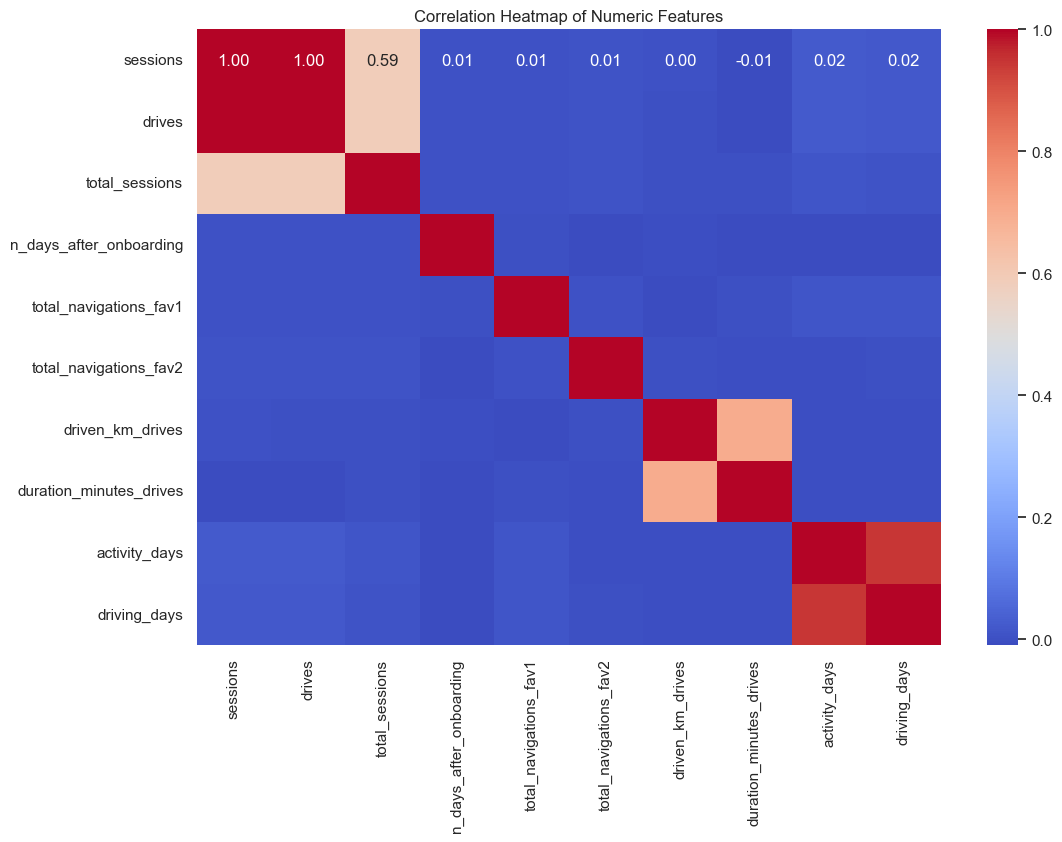

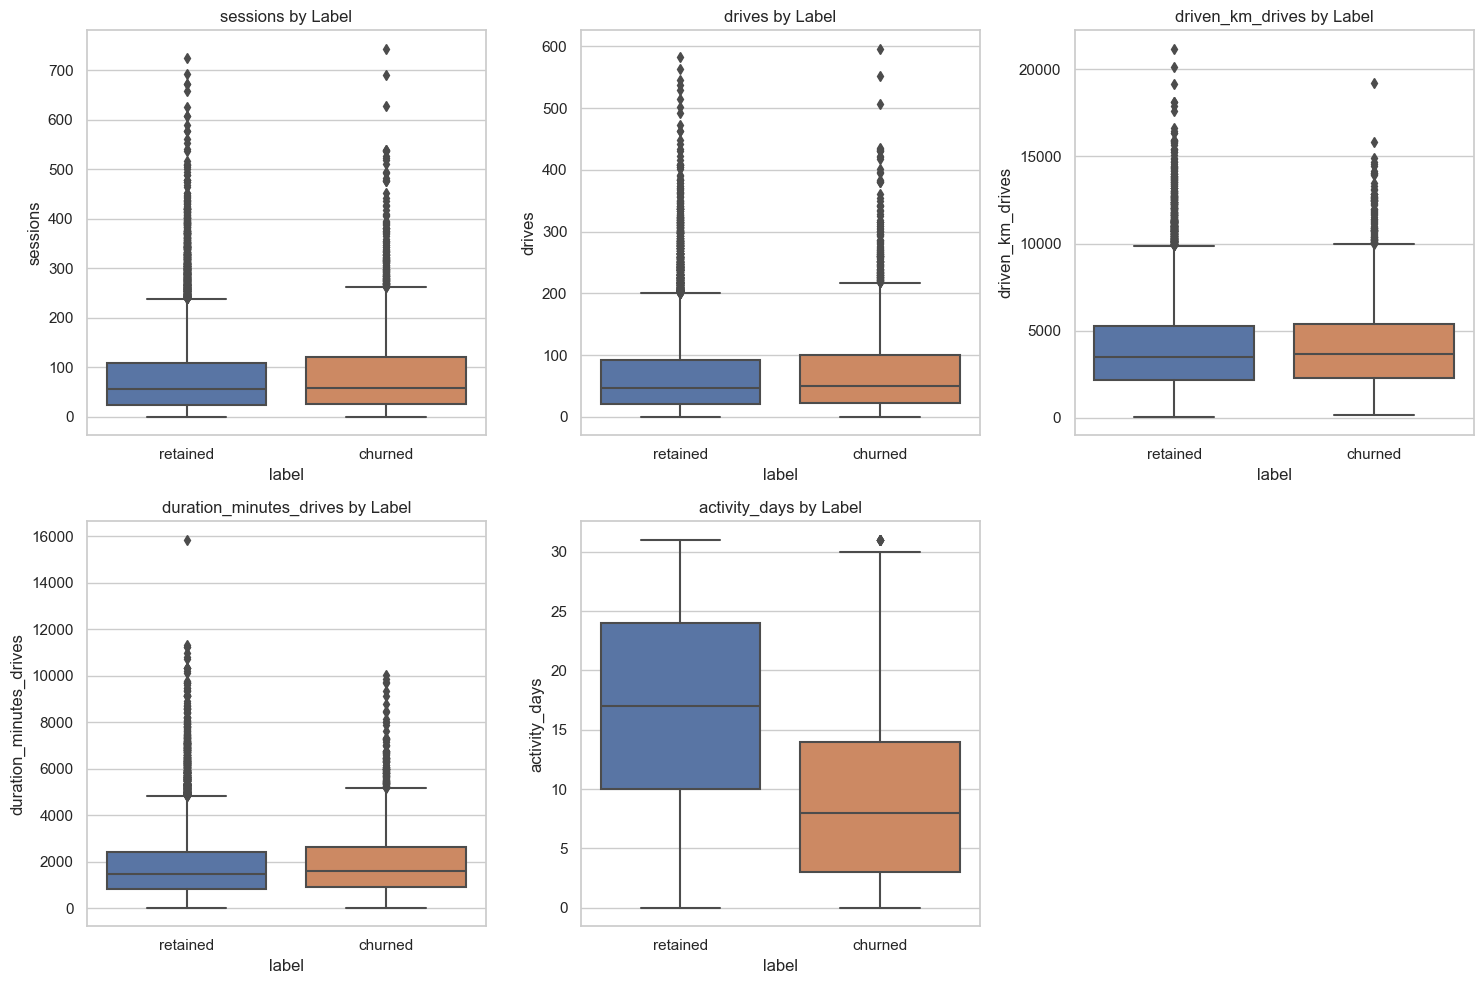

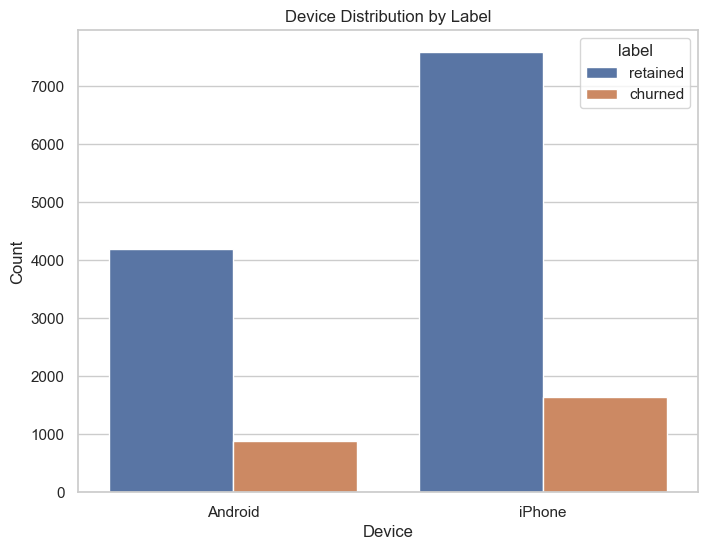

In [4]:
# Set plot style
sns.set(style="whitegrid")

# 1. Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data)
plt.title('Distribution of Churn vs Retained Users')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# 2. Correlation heatmap for numeric features
plt.figure(figsize=(12, 8))
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.drop('ID')
corr = data[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# 3. Boxplot of key features by label
key_features = ['sessions', 'drives', 'driven_km_drives', 'duration_minutes_drives', 'activity_days']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='label', y=feature, data=data)
    plt.title(f'{feature} by Label')
plt.tight_layout()
plt.show()

# 4. Device distribution by label
plt.figure(figsize=(8, 6))
sns.countplot(x='device', hue='label', data=data)
plt.title('Device Distribution by Label')
plt.xlabel('Device')
plt.ylabel('Count')
plt.show()

In [10]:
# Drop rows with missing labels for modeling
data = data.dropna(subset=['label'])

# Encode categorical variable 'device'
data['device'] = data['device'].map({'iPhone': 1, 'Android': 0})

# Define features and target
X = data.drop(['ID', 'label'], axis=1)
y = data['label'].map({'retained': 0, 'churned': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the cleaned data to a CSV file
data.to_csv('cleaned_waze_dataset.csv', index=False)

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2337
           1       0.63      0.09      0.15       523

    accuracy                           0.82      2860
   macro avg       0.73      0.54      0.53      2860
weighted avg       0.79      0.82      0.76      2860

Confusion Matrix:
 [[2310   27]
 [ 477   46]]
Accuracy: 0.8237762237762237


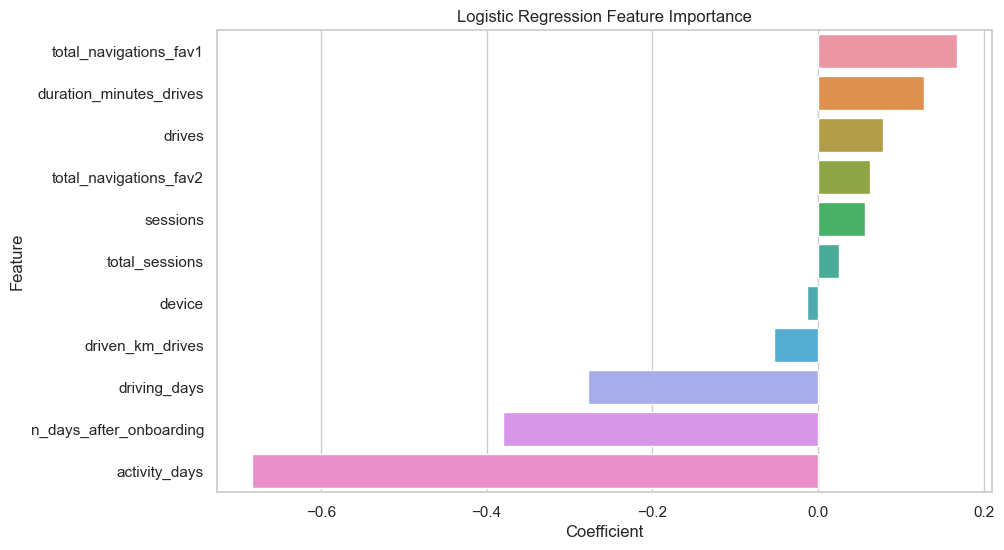

In [6]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Evaluate
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

# Feature importance (coefficients)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Logistic Regression Feature Importance')
plt.show()

In [7]:
# Naïve Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

# Evaluate
print("Naïve Bayes Performance:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Naïve Bayes Performance:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      2337
           1       0.41      0.33      0.37       523

    accuracy                           0.79      2860
   macro avg       0.63      0.61      0.62      2860
weighted avg       0.77      0.79      0.78      2860

Confusion Matrix:
 [[2084  253]
 [ 349  174]]
Accuracy: 0.7895104895104895


In [8]:
# Voting Ensemble
ensemble = VotingClassifier(estimators=[
    ('lr', LogisticRegression(random_state=42)),
    ('nb', GaussianNB())
], voting='soft')
ensemble.fit(X_train_scaled, y_train)
y_pred_ensemble = ensemble.predict(X_test_scaled)

# Evaluate
print("Voting Ensemble Performance:")
print(classification_report(y_test, y_pred_ensemble))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))

Voting Ensemble Performance:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2337
           1       0.45      0.22      0.29       523

    accuracy                           0.81      2860
   macro avg       0.64      0.58      0.59      2860
weighted avg       0.77      0.81      0.78      2860

Confusion Matrix:
 [[2195  142]
 [ 409  114]]
Accuracy: 0.8073426573426573
